In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

/tmp/ipykernel_84614/2080034654.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


### T2. Plot the posteriors values of the two classes on the same axis. Using the likelihood ratio test, what is the decision boundary for this classifier? Assume equal prior probabilities.

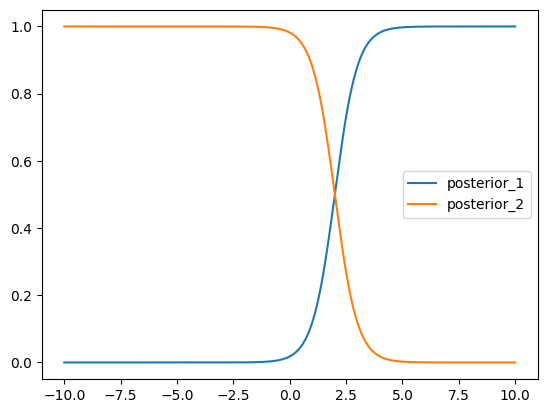

/home/codespace/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


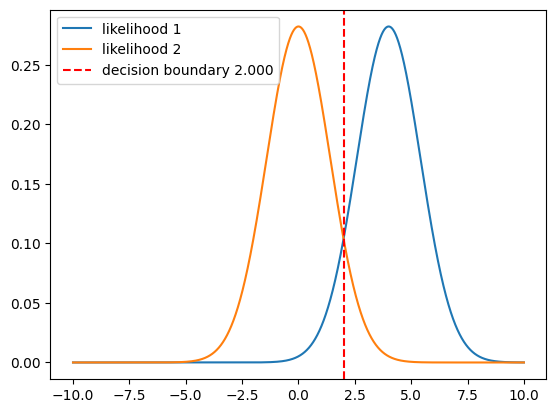

In [2]:
mean_1 = 4
variance_1 = 2
mean_2 = 0
variance_2 = 2

prior_prob = 0.5

x = np.arange(-10, 10, 0.00001)

# normal distribution
likelihood_1 = (1 / np.sqrt(2 * np.pi * variance_1)) * np.exp(-((x - mean_1) ** 2) / (2 * variance_1))
likelihood_2 = (1 / np.sqrt(2 * np.pi * variance_2)) * np.exp(-((x - mean_2) ** 2) / (2 * variance_2))

evidence = likelihood_1 * prior_prob + likelihood_2 * prior_prob

posterior_1 = likelihood_1 * prior_prob / evidence
posterior_2 = likelihood_2 * prior_prob / evidence

plt.plot(x, posterior_1, label='posterior_1')
plt.plot(x, posterior_2, label='posterior_2')
plt.legend()
plt.show()

likelihood_ratio = likelihood_1 / likelihood_2
priors_ratio = prior_prob / prior_prob

boundary_position = x[likelihood_ratio >= priors_ratio][0]
decision_boundary = likelihood_2[x == boundary_position]

plt.plot(x, likelihood_1, label="likelihood 1")
plt.plot(x, likelihood_2, label="likelihood 2")
plt.axvline(x=boundary_position, color='r', linestyle='--', label=f"decision boundary {boundary_position:.3f}")
plt.legend()
plt.show()

### T3. What happen to the decision boundary if the cat is happy with a prior of 0.75?

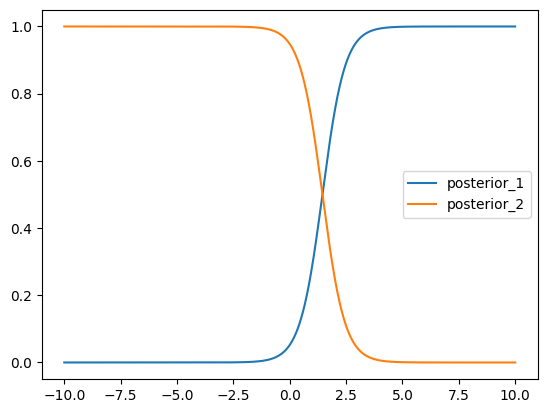

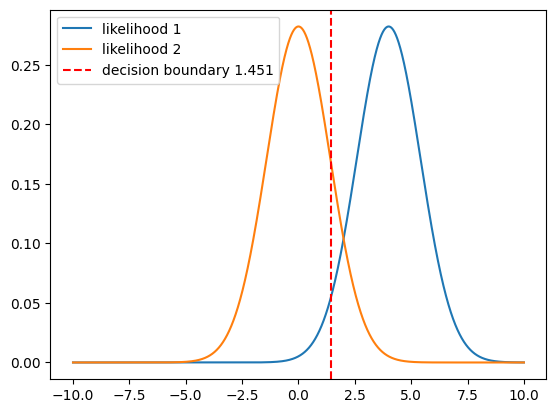

In [3]:
mean_1 = 4
variance_1 = 2
mean_2 = 0
variance_2 = 2

prior_1 = 0.75
prior_2 = 1 - prior_1

x = np.arange(-10, 10, 0.00001)

# normal distribution
likelihood_1 = (1 / np.sqrt(2 * np.pi * variance_1)) * np.exp(-((x - mean_1) ** 2) / (2 * variance_1))
likelihood_2 = (1 / np.sqrt(2 * np.pi * variance_2)) * np.exp(-((x - mean_2) ** 2) / (2 * variance_2))

evidence = likelihood_1 * prior_1 + likelihood_2 * prior_2

posterior_1 = likelihood_1 * prior_1 / evidence
posterior_2 = likelihood_2 * prior_2 / evidence

plt.plot(x, posterior_1, label='posterior_1')
plt.plot(x, posterior_2, label='posterior_2')
plt.legend()
plt.show()

likelihood_ratio = likelihood_1 / likelihood_2
priors_ratio = prior_2 / prior_1

boundary_position = x[likelihood_ratio >= priors_ratio][0]
decision_boundary = likelihood_2[x == boundary_position]

plt.plot(x, likelihood_1, label="likelihood 1")
plt.plot(x, likelihood_2, label="likelihood 2")
plt.axvline(x=boundary_position, color='r', linestyle='--', label=f"decision boundary {boundary_position:.3f}")
plt.legend()
plt.show()


### OT3. Plot the posteriors values of the two classes on the same axis. What is the decision boundary for this classifier? Assume equal prior probabilities.

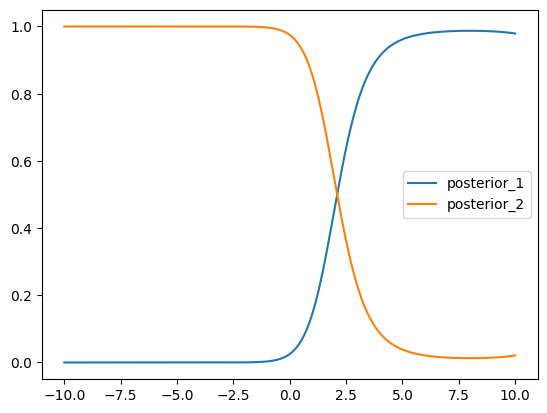

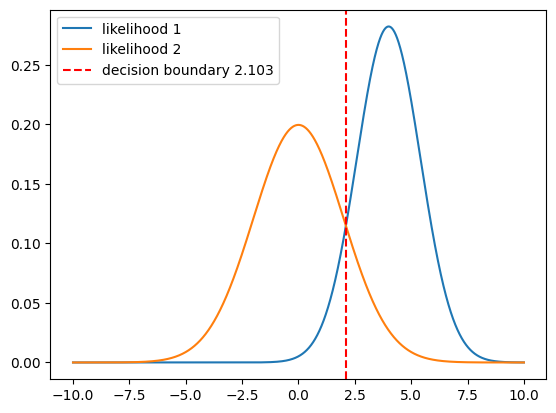

In [4]:
mean_1 = 4
variance_1 = 2
mean_2 = 0
variance_2 = 4

prior_1 = 0.5
prior_2 = 1 - prior_1

x = np.arange(-10, 10, 0.00001)

# normal distribution
likelihood_1 = (1 / np.sqrt(2 * np.pi * variance_1)) * np.exp(-((x - mean_1) ** 2) / (2 * variance_1))
likelihood_2 = (1 / np.sqrt(2 * np.pi * variance_2)) * np.exp(-((x - mean_2) ** 2) / (2 * variance_2))

evidence = likelihood_1 * prior_1 + likelihood_2 * prior_2

posterior_1 = likelihood_1 * prior_1 / evidence
posterior_2 = likelihood_2 * prior_2 / evidence

plt.plot(x, posterior_1, label='posterior_1')
plt.plot(x, posterior_2, label='posterior_2')
plt.legend()
plt.show()

likelihood_ratio = likelihood_1 / likelihood_2
priors_ratio = prior_2 / prior_1

boundary_position = x[likelihood_ratio >= priors_ratio][0]
decision_boundary = likelihood_2[x == boundary_position]

plt.plot(x, likelihood_1, label="likelihood 1")
plt.plot(x, likelihood_2, label="likelihood 2")
plt.axvline(x=boundary_position, color='r', linestyle='--', label=f"decision boundary {boundary_position:.3f}")
plt.legend()
plt.show()


# Employee Attrition Prediction



In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### read CSV

In [6]:
df = pd.read_csv('../hr-employee-attrition-with-null.csv')

### Dataset statistic

In [7]:
df.describe()

,Unnamed: 0,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1176.000000,1176.000000,1176.00000,1176.000000,1176.0,1176.000000,1176.000000,1176.000000,1176.000000,...,1176.000000,1176.0,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000
mean,734.500000,37.134354,798.875850,9.37500,2.920918,1.0,1031.399660,2.733844,65.821429,2.728741,...,2.694728,80.0,0.752551,11.295068,2.787415,2.770408,7.067177,4.290816,2.159014,4.096939
std,424.496761,9.190317,406.957684,8.23049,1.028796,0.0,601.188955,1.092992,20.317323,0.705280,...,1.093660,0.0,0.822550,7.783376,1.290507,0.705004,6.127836,3.630901,3.163524,3.537393
min,0.000000,18.000000,102.000000,1.00000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,367.250000,30.000000,457.750000,2.00000,2.000000,1.0,494.750000,2.000000,48.000000,2.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,734.500000,36.000000,798.500000,7.00000,3.000000,1.0,1027.500000,3.000000,66.000000,3.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,1101.750000,43.000000,1168.250000,15.00000,4.000000,1.0,1562.250000,4.000000,84.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,10.000000,7.000000,2.250000,7.000000
max,1469.000000,60.000000,1499.000000,29.00000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,37.000000,18.000000,15.000000,17.000000


In [8]:
df.head()

,Unnamed: 0,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0,41.0,Yes,Travel_Rarely,NaN,NaN,1.0,NaN,Life Sciences,1.0,...,1.0,80.0,0.0,8.0,0.0,NaN,6.0,NaN,0.0,NaN
1,1,NaN,No,NaN,279.0,Research & Development,NaN,NaN,Life Sciences,1.0,...,4.0,NaN,1.0,10.0,NaN,3.0,10.0,NaN,NaN,7.0
2,2,37.0,Yes,NaN,1373.0,NaN,2.0,2.0,NaN,1.0,...,NaN,80.0,0.0,7.0,3.0,NaN,NaN,0.0,NaN,0.0
3,3,NaN,No,Travel_Frequently,1392.0,Research & Development,3.0,4.0,Life Sciences,NaN,...,3.0,NaN,NaN,8.0,3.0,NaN,8.0,NaN,3.0,0.0
4,4,27.0,No,Travel_Rarely,591.0,Research & Development,2.0,1.0,Medical,1.0,...,4.0,80.0,1.0,6.0,NaN,3.0,2.0,2.0,2.0,NaN


### Feature transformation

In [9]:
df.loc[df["Attrition"] == "no", "Attrition"] = 0.0
df.loc[df["Attrition"] == "yes", "Attrition"] = 1.0
string_categorical_col = ['Department', 'Attrition', 'BusinessTravel', 'EducationField', 'Gender', 'JobRole',
                              'MaritalStatus', 'Over18', 'OverTime']

# ENCODE STRING COLUMNS TO CATEGORICAL COLUMNS
for col in string_categorical_col:
    df[col] = pd.Categorical(df[col]).codes

# HANDLE NULL NUMBERS
# drop all null rows
# df.dropna()
# fill null with mean and mode
# for col in df.columns:
#     if col not in string_categorical_col:
#         df[col] = df[col].fillna(df[col].mean())
#     else:
#         df[col] = df[col].fillna(df[col].mode()[0])

df = df.loc[:, ~df.columns.isin(['EmployeeNumber', 'Unnamed: 0', 'EmployeeCount', 'StandardHours', 'Over18'])]

###  Spliting data into train and test

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
df_train, df_test = train_test_split(df, test_size=0.1, random_state=13, stratify=df['Attrition'])

### Display histogram of each feature

In [12]:
def display_histogram(df, col_name, cls, n_bin = 40):
    
    if cls != -1:
        selected_df = df.loc[df["Attrition"] == cls, col_name]
    else:
        selected_df = df[col_name]
   
    # remove NaN values
    train_col_no_nan = selected_df[~np.isnan(selected_df)]

    # bin the data into 40 equally spaced bins
    # hist is the count for each bin
    # bin_edge is the edge values of the bins
    hist, bin_edge = np.histogram(train_col_no_nan, n_bin)

    # normalize using the total number of data points
    hist = hist / hist.sum()

    zero_bins = np.where(hist == 0)[0].shape[0]
    # plot the histogram
    plt.title(f"{col_name} histogram with zero bins: {zero_bins} (bin size = {n_bin})")
    plt.fill_between(bin_edge.repeat(2)[1:-1],
    hist.repeat(2),facecolor='steelblue')
    plt.show()

### T4. Observe the histogram for Age, MonthlyIncome and DistanceFromHome. How many bins have zero counts? Do you think this is a good discretization? Why?

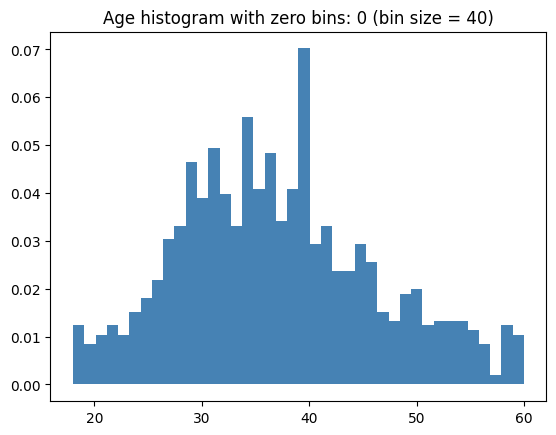

In [13]:
display_histogram(df_train, "Age", -1)

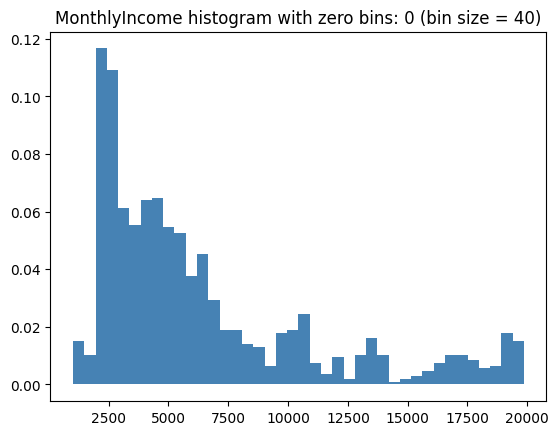

In [14]:
display_histogram(df_train, "MonthlyIncome", -1)

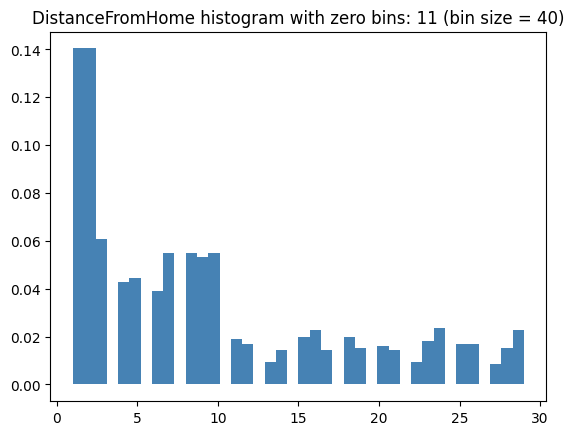

In [15]:
display_histogram(df_train, "DistanceFromHome", -1)

Age and MonthlyIncome digitization is good, but DistanceFromHome is not due to many zero bins.

### T5. Can we use a Gaussian to estimate this histogram? Why? What about a Gaussian Mixture Model (GMM)?

We can use a Gaussian for estimating the Age histogram, and a Gaussian Mixture Model might be suitable for MonthlyIncome since the plot suggests multiple normal distributions. However, for WorkDistanceFromHome, neither a Gaussian nor a Gaussian Mixture Model seems appropriate, as the plot appears to combine uniform distributions with varying amplitudes.

### T6. Now plot the histogram according to the method described above (with 10, 40, and 100 bins) and show 3 plots each for Age, MonthlyIncome, and DistanceFromHome. Which bin size is most sensible for each features? Why?

In [16]:
def display_histogram_custom(df, col_name, cls, n_bin = 40):
    
    if cls != -1:
        selected_df = df.loc[df["Attrition"] == cls, col_name]
    else:
        selected_df = df[col_name]
   
    # remove NaN values
    train_col_no_nan = selected_df[~np.isnan(selected_df)]

    # bin each values in the training set into bins using the function np.digitize
    bin_edges = np.linspace(train_col_no_nan.min(), train_col_no_nan.max(), n_bin-1)
    # make sure your first bin should cover -inf and the last bin should cover inf
    bin_edges = np.insert(bin_edges, 0, -np.inf)
    bin_edges = np.insert(bin_edges, len(bin_edges), np.inf)
    bin_idx = np.digitize(train_col_no_nan, bin_edges)
    
    # count the number of data points in each bin
    hist = np.bincount(bin_idx)[1:]

    # make sure to import matplotlib.pyplot as plt
    # plot the histogram
    plt.title(f"{col_name} histogram (bin size = {n_bin})")
    plt.fill_between(np.arange(n_bin), hist,facecolor='steelblue')
    hist.repeat(2)
    plt.show()


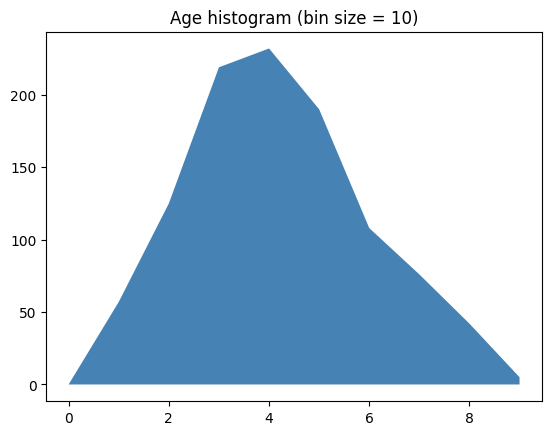

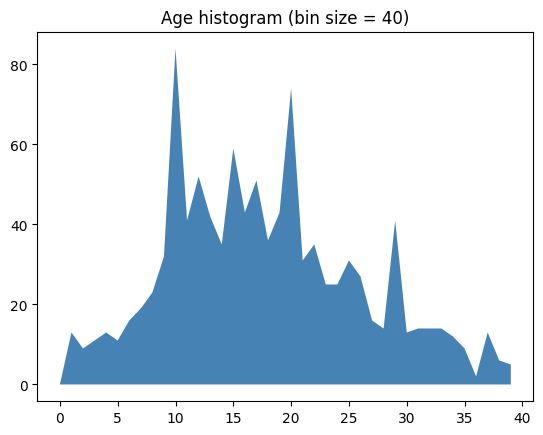

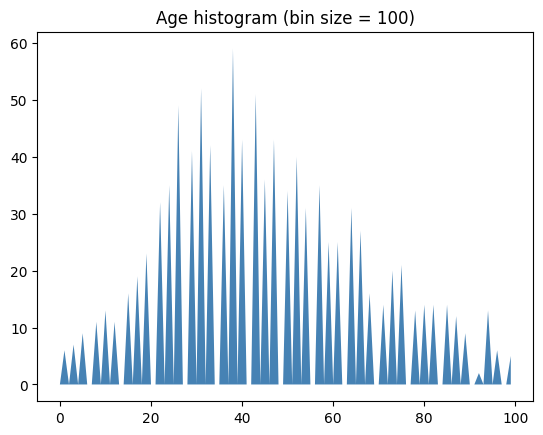

In [17]:
display_histogram_custom(df_train, "Age", -1, 10)
display_histogram_custom(df_train, "Age", -1, 40)
display_histogram_custom(df_train, "Age", -1, 100)


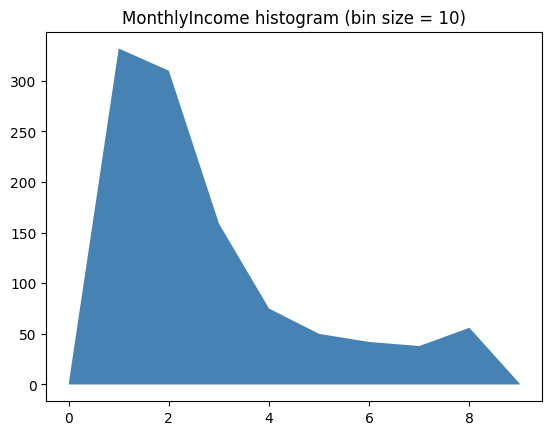

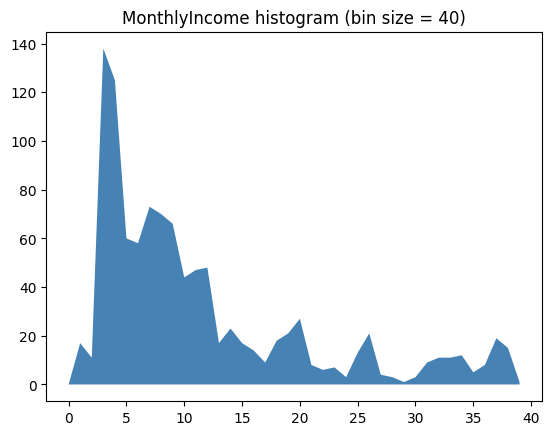

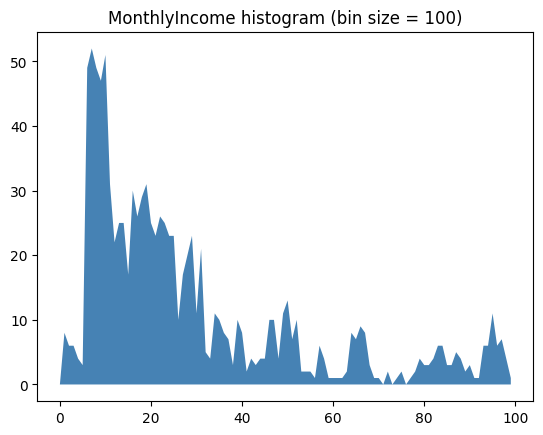

In [18]:

display_histogram_custom(df_train, "MonthlyIncome", -1, 10)
display_histogram_custom(df_train, "MonthlyIncome", -1, 40)
display_histogram_custom(df_train, "MonthlyIncome", -1, 100)


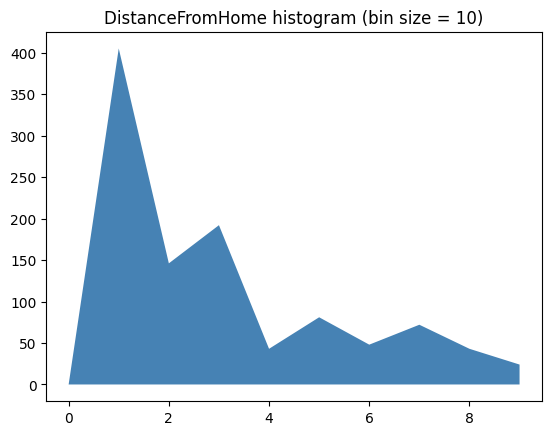

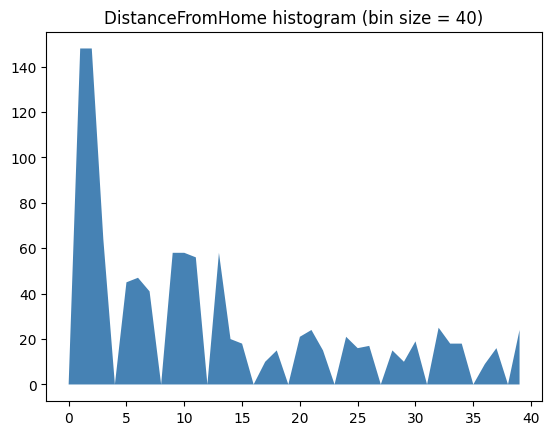

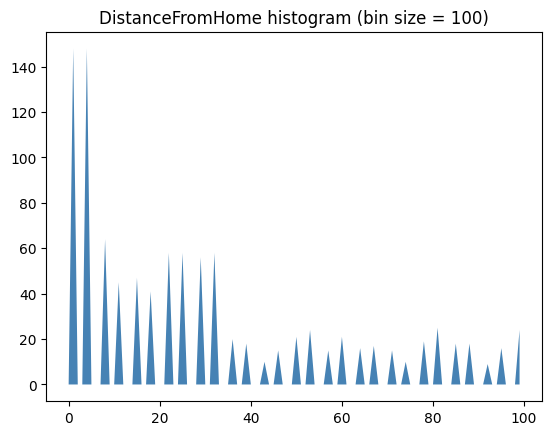

In [19]:
display_histogram_custom(df_train, "DistanceFromHome", -1, 10)
display_histogram_custom(df_train, "DistanceFromHome", -1, 40)
display_histogram_custom(df_train, "DistanceFromHome", -1, 100)

For the Age feature, a bin size of 40 is the most sensible choice as the histogram appears to follow a normal distribution. This bin size balances between capturing data details and maintaining a smooth representation.

In the case of MonthlyIncome, a bin size of 40 is the most sensible since a bin size of 10 oversimplifies, and a bin size of 100 increase zero bins.

For DistanceFromHome, a bin size of 10 is the most sensible option, as with bin sizes 40 and 100, the histogram starts to show an increase in the number of zero bins.

### T7. For the rest of the features, which one should be discretized in order to be modeled by histograms? What are the criteria for choosing whether we should discretize a feature or not? Answer this and discretize those features into 10 bins each. In other words, figure out the bin edge for each feature, then use digitize() to convert the features to discrete values

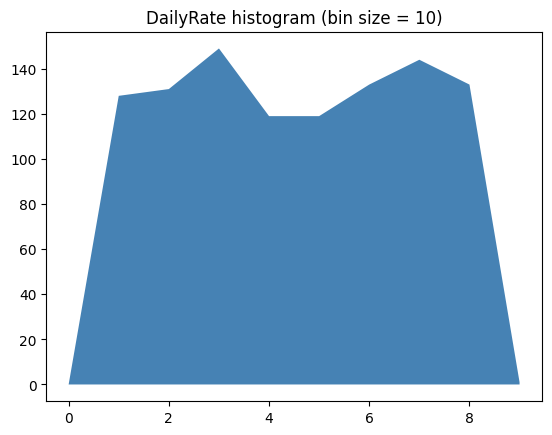

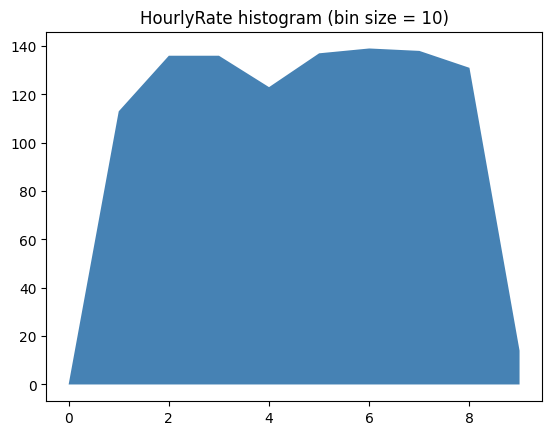

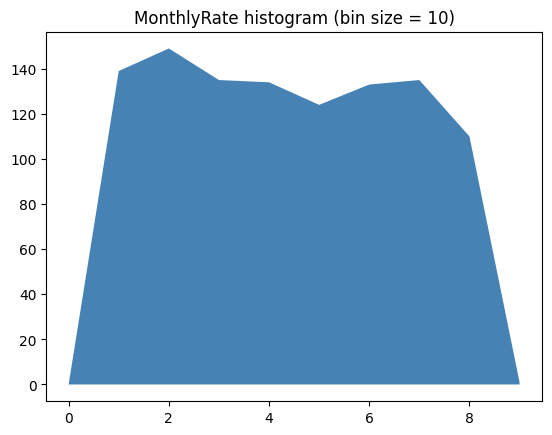

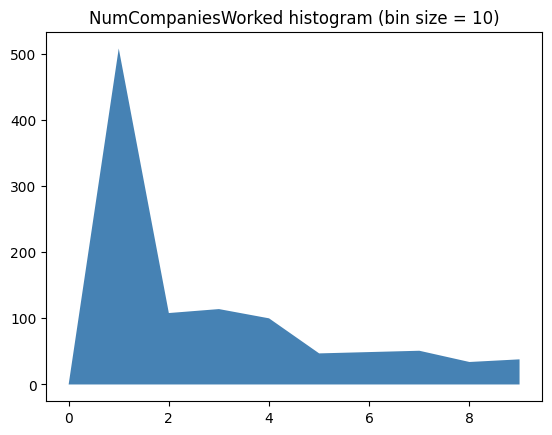

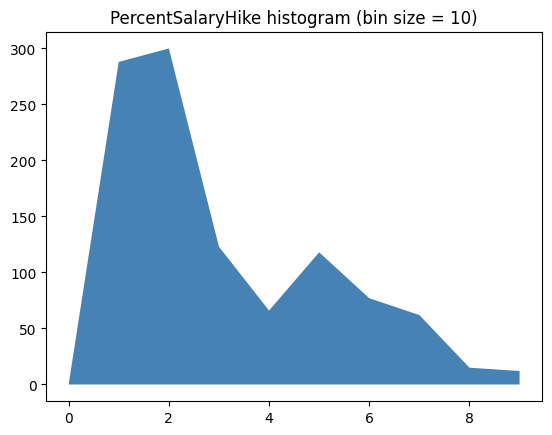

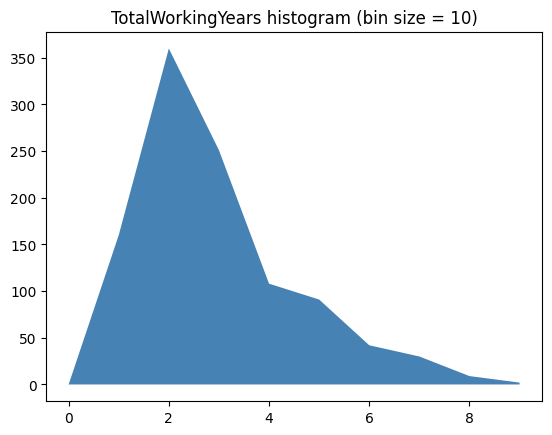

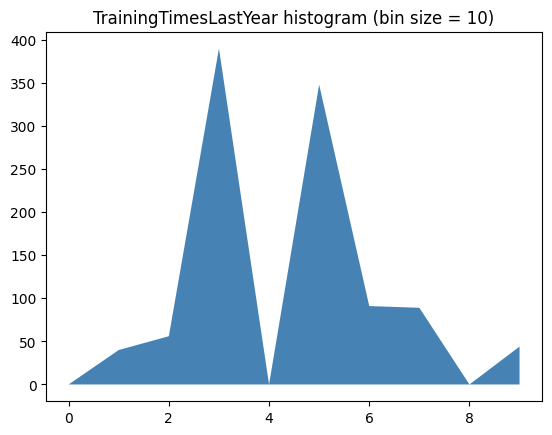

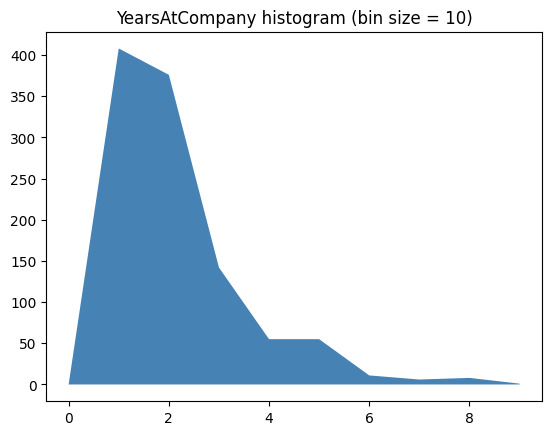

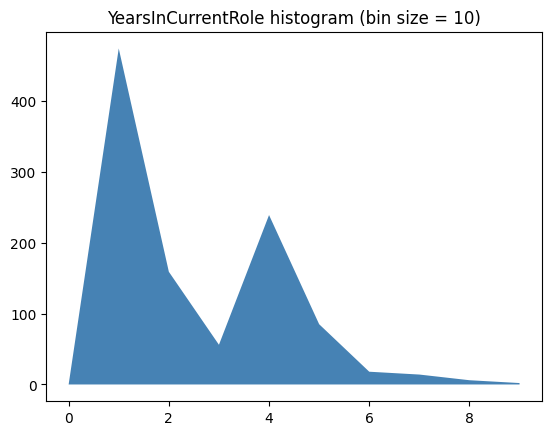

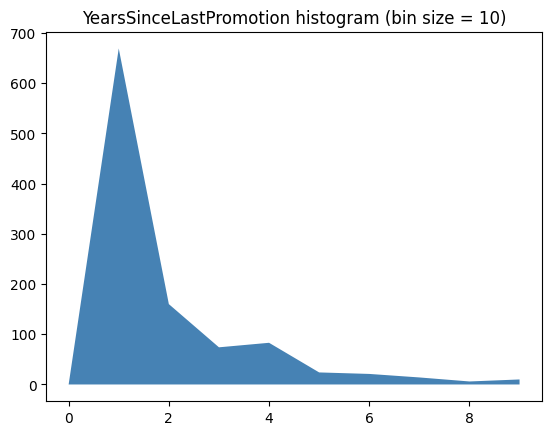

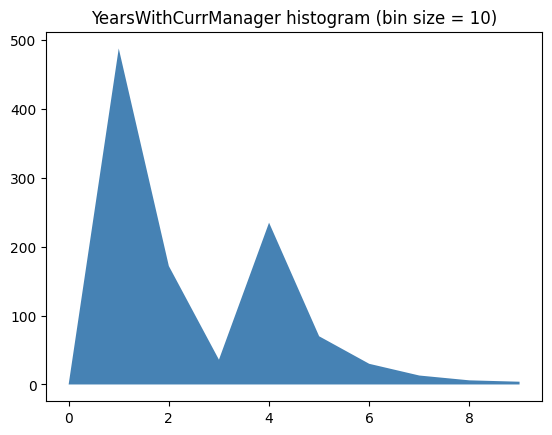

In [20]:
done_cols = ['Age', 'MonthlyIncome', 'DistanceFromHome']
cat_cols = ['Department', 'Attrition', 'BusinessTravel', 'EducationField', 'Gender', 'JobRole',
                              'MaritalStatus', 'Over18', 'OverTime']
rating_cols = ['Education', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobSatisfaction', 'PerformanceRating', 'RelationshipSatisfaction', 'WorkLifeBalance']
level_cols = ['StockOptionLevel', 'JobLevel']
selected_cols = [col for col in df.columns if col not in (done_cols + cat_cols + rating_cols + level_cols)]
filtered_cols = [col for col in selected_cols if df_train[col].nunique() > 10]
for col in selected_cols:
    display_histogram_custom(df_train, col, -1, 10)

I filter categorical features, select only continuous ones, and then exclude columns with a narrow range by dropping those with fewer than 10 unique values (bins).

selected:
- DailyRate
- HourlyRate
- MonthlyRate
- PercentSalaryHike
- TotalWorkingYears
- YearsAtCompany
- YearsInCurrentRole
- YearsSinceLastPromotion
- YearsWithCurrManager

### T8. What kind of distribution should we use to model histograms? (Answer a distribution name) What is the MLE for the likelihood distribution? (Describe how to do the MLE). Plot the likelihood distributions of MonthlyIncome, JobRole, HourlyRate, and MaritalStatus for different Attrition values.

In [21]:
def plot_likelihood_distribution(df, col_name, cls, n_bin = 40):
    if cls != -1:
        selected_df = df.loc[df["Attrition"] == cls, col_name]
    else:
        selected_df = df[col_name]
   
    # remove NaN values
    train_col_no_nan = selected_df[~np.isnan(selected_df)]

    # bin each values in the training set into bins using the function np.digitize
    bin_edges = np.linspace(train_col_no_nan.min(), train_col_no_nan.max(), n_bin-1)
    # make sure your first bin should cover -inf and the last bin should cover inf
    bin_edges = np.insert(bin_edges, 0, -np.inf)
    bin_edges = np.insert(bin_edges, len(bin_edges), np.inf)
    bin_idx = np.digitize(train_col_no_nan, bin_edges)
    
    # count the number of data points in each bin
    hist = np.bincount(bin_idx)[1:]
    hist = hist/hist.sum()

    # make sure to import matplotlib.pyplot as plt
    # plot the histogram
    title = f"{col_name} histogram (bin size = {n_bin})"
    if cls != -1:
        title = f"{col_name} histogram for Attrition = {cls} (bin size = {n_bin})"
    plt.title(title)
    plt.fill_between(np.arange(n_bin), hist,facecolor='steelblue')
    hist.repeat(2)
    plt.show()


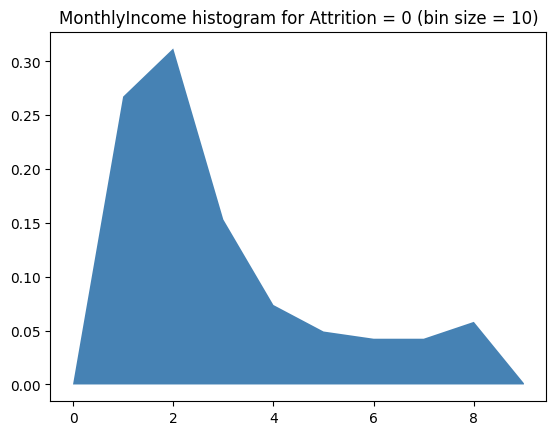

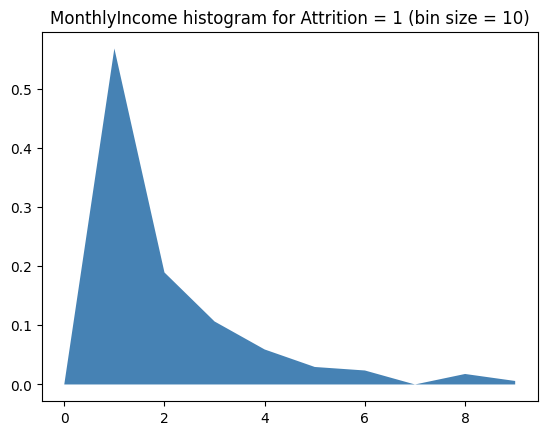

In [22]:
plot_likelihood_distribution(df_train, "MonthlyIncome", 0, 10)
plot_likelihood_distribution(df_train, "MonthlyIncome", 1, 10)

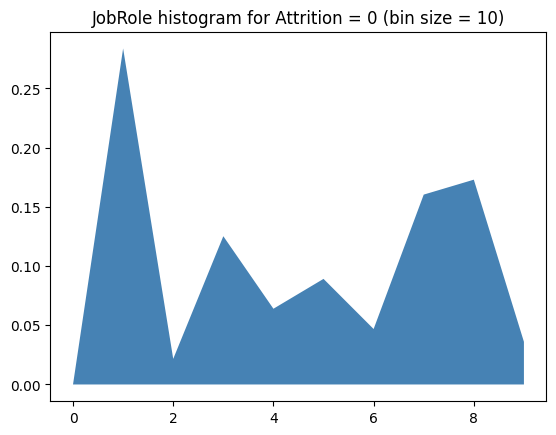

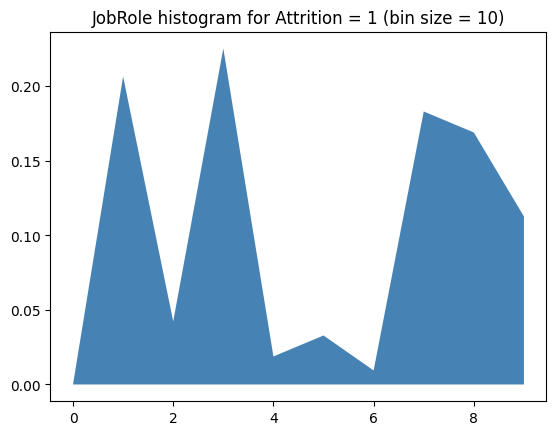

In [23]:
plot_likelihood_distribution(df_train, "JobRole", 0, 10)
plot_likelihood_distribution(df_train, "JobRole", 1, 10)

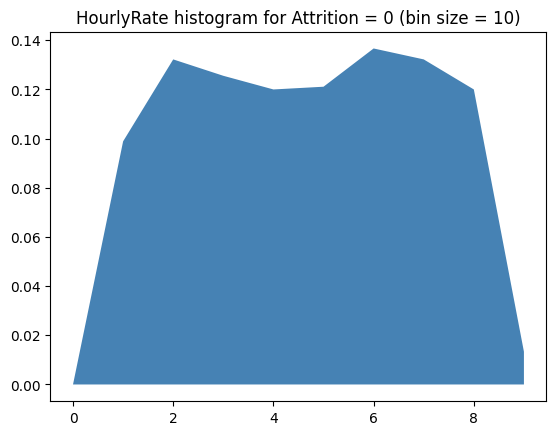

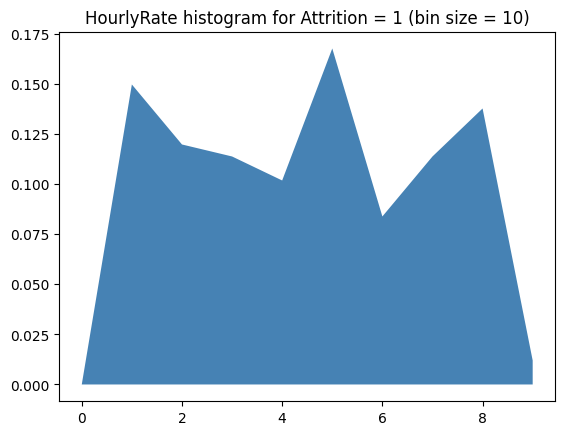

In [24]:
plot_likelihood_distribution(df_train, "HourlyRate", 0, 10)
plot_likelihood_distribution(df_train, "HourlyRate", 1, 10)

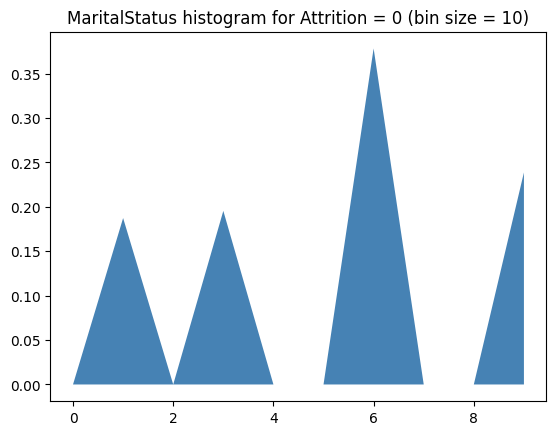

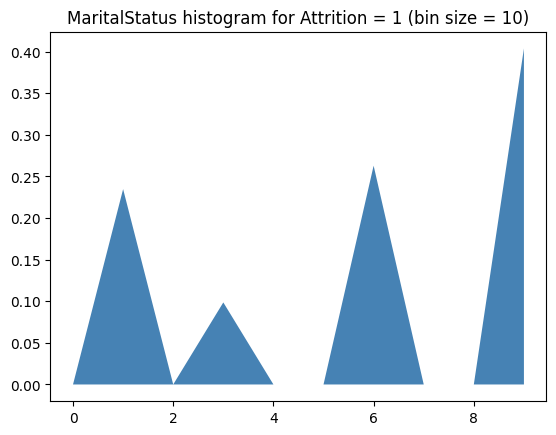

In [25]:
plot_likelihood_distribution(df_train, "MaritalStatus", 0, 10)
plot_likelihood_distribution(df_train, "MaritalStatus", 1, 10)

### T9. What is the prior distribution of the two classes?

In [26]:
n_stay = df_train[df_train['Attrition'] == 1].shape[0]
n_leave = df_train[df_train['Attrition'] == 0].shape[0]
n = df_train.shape[0]
prior_stay = n_stay / n
prior_leave = n_leave / n
print(f"Prior class stay: {prior_stay:.3f}")
print(f"Prior class leave: {prior_leave:.3f}")

Prior class stay: 0.161
Prior class leave: 0.839


### T10. If we use the current Naive Bayes with our current Maximum Likelihood Estimates, we will find that some P (x i |attrition) will be zero and will result in the entire product term to be zero. Propose a method to fix this problem.

Dealing zero probabilities by adding a small constant multiplied by priors for each class

### T11. Implement your Naive Bayes classifier. Use the learned distributions to classify the test set. Don’t forget to allow your classifier to handle missing values in the test set. Report the overall Accuracy. Then, report the Precision, Recall, and F score for detecting attrition. See Lecture 1 for the definitions of each metric.


In [27]:
from SimpleBayesClassifier import SimpleBayesClassifier

In [28]:
data_train = df_train.to_numpy()
data_test = df_test.to_numpy()

In [29]:
x_train = df_train.loc[:, df_train.columns != 'Attrition'].to_numpy()
y_train = df_train['Attrition'].to_numpy()

x_test = df_test.loc[:, df_test.columns != 'Attrition'].to_numpy()
y_test = df_test['Attrition'].to_numpy()

In [30]:
model = SimpleBayesClassifier(n_pos = sum(y_train == 1), n_neg = sum(y_train == 0))

In [31]:
def check_prior():
    """
    This function designed to test the implementation of the prior probability calculation in a Naive Bayes classifier. 
    Specifically, it checks if the classifier correctly computes the prior probabilities for the 
    negative and positive classes based on given input counts.
    """
    
    # prior_neg = 5/(5 + 5) = 0.5 and # prior_pos = 5/(5 + 5) = 0.5
    assert (SimpleBayesClassifier(5, 5).prior_pos, SimpleBayesClassifier(5, 5).prior_neg) == (0.5, 0.5)

    assert (SimpleBayesClassifier(3, 5).prior_pos, SimpleBayesClassifier(3, 5).prior_neg) == (0.375, 0.625)
    assert (SimpleBayesClassifier(0, 1).prior_pos, SimpleBayesClassifier(0, 1).prior_neg) == (0, 1)
    assert (SimpleBayesClassifier(1, 0).prior_pos, SimpleBayesClassifier(1, 0).prior_neg) == (1, 0)
    
check_prior()

In [32]:
model.fit_params(x_train, y_train, n_bins=10)

([(array([1.81918341e-10, 3.38983052e-02, 1.12994350e-01, 1.92090395e-01,
          2.39548022e-01, 1.92090395e-01, 1.11864407e-01, 7.68361582e-02,
          3.50282487e-02, 5.64971768e-03]),
   array([ -inf, 18.  , 23.25, 28.5 , 33.75, 39.  , 44.25, 49.5 , 54.75,
          60.  ,   inf])),
  (array([1.45043002e-10, 2.05405405e-01, 1.45043002e-10, 8.82882883e-02,
          1.45043002e-10, 1.45043002e-10, 1.31531531e-01, 1.45043002e-10,
          1.45043002e-10, 5.74774774e-01]),
   array([  -inf, -1.   , -0.625, -0.25 ,  0.125,  0.5  ,  0.875,  1.25 ,
           1.625,  2.   ,    inf])),
  (array([1.79284780e-10, 1.22494432e-01, 1.13585746e-01, 1.42538975e-01,
          1.13585746e-01, 1.12472160e-01, 1.29175946e-01, 1.40311804e-01,
          1.24721603e-01, 1.11358592e-03]),
   array([    -inf,  102.   ,  276.625,  451.25 ,  625.875,  800.5  ,
           975.125, 1149.75 , 1324.375, 1499.   ,      inf])),
  (array([1.45043002e-10, 1.98198198e-01, 1.45043002e-10, 3.15315316e-02,
      

In [33]:
def check_fit_params():

    """
    This function is designed to test the fit_params method of a SimpleBayesClassifier. 
    This method is presumably responsible for computing parameters for a Naive Bayes classifier 
    based on the provided training data. The parameters in this context is bins and edges from each histogram.
    """

    T = SimpleBayesClassifier(2, 2)
    X_TRAIN_CASE_1 = np.array([
        [0, 1, 2, 3],
        [1, 2, 3, 4],
        [2, 3, 4, 5],
        [3, 4, 5, 6]
    ])
    Y_TRAIN_CASE_1 = np.array([0, 1, 0, 1])
    STAY_PARAMS_1, LEAVE_PARAMS_1 = T.fit_params(X_TRAIN_CASE_1, Y_TRAIN_CASE_1)

    print("STAY PARAMETERS")
    for f_idx in range(len(STAY_PARAMS_1)):
        print(f"Feature : {f_idx}")
        print(f"BINS : {STAY_PARAMS_1[f_idx][0]}")
        print(f"EDGES : {STAY_PARAMS_1[f_idx][1]}")
    print("")    
    print("LEAVE PARAMETERS")
    for f_idx in range(len(STAY_PARAMS_1)):
        print(f"Feature : {f_idx}")
        print(f"BINS : {LEAVE_PARAMS_1[f_idx][0]}")
        print(f"EDGES : {LEAVE_PARAMS_1[f_idx][1]}")

check_fit_params()

STAY PARAMETERS
Feature : 0
BINS : [2.4999975e-07 4.9999975e-01 2.4999975e-07 2.4999975e-07 2.4999975e-07
 2.4999975e-07 2.4999975e-07 2.4999975e-07 2.4999975e-07 4.9999975e-01]
EDGES : [-inf 0.   0.25 0.5  0.75 1.   1.25 1.5  1.75 2.    inf]
Feature : 1
BINS : [2.4999975e-07 4.9999975e-01 2.4999975e-07 2.4999975e-07 2.4999975e-07
 2.4999975e-07 2.4999975e-07 2.4999975e-07 2.4999975e-07 4.9999975e-01]
EDGES : [-inf 1.   1.25 1.5  1.75 2.   2.25 2.5  2.75 3.    inf]
Feature : 2
BINS : [2.4999975e-07 4.9999975e-01 2.4999975e-07 2.4999975e-07 2.4999975e-07
 2.4999975e-07 2.4999975e-07 2.4999975e-07 2.4999975e-07 4.9999975e-01]
EDGES : [-inf 2.   2.25 2.5  2.75 3.   3.25 3.5  3.75 4.    inf]
Feature : 3
BINS : [2.4999975e-07 4.9999975e-01 2.4999975e-07 2.4999975e-07 2.4999975e-07
 2.4999975e-07 2.4999975e-07 2.4999975e-07 2.4999975e-07 4.9999975e-01]
EDGES : [-inf 3.   3.25 3.5  3.75 4.   4.25 4.5  4.75 5.    inf]

LEAVE PARAMETERS
Feature : 0
BINS : [2.4999975e-07 4.9999975e-01 2.4999975e

In [34]:
y_pred = model.predict(x = x_test)

In [35]:
def evaluate(y_true, y_pred, show_result = True):
  tp = sum((y_true == 1) & (y_pred == 1)) + 1e-10
  tn = sum((y_true == 0) & (y_pred == 0)) + 1e-10
  fp = sum((y_true == 0) & (y_pred == 1)) + 1e-10
  fn = sum((y_true == 1) & (y_pred == 0)) + 1e-10
  accuracy = (tp + tn) / (tp + tn + fp + fn)
  precision = tp / (tp + fp )
  recall = tp / (tp + fn )
  F1 = 2 * (precision * recall) / (precision + recall)
  fpr = fp / (fp + tn)
  if show_result:
    print(f"TP: {tp}, TN: {tn}, FP: {fp}, FN: {fn}")
    print(f"Accuracy: {accuracy:.3f}")
    print(f"Precision: {precision:.3f}")
    print(f"Recall: {recall:.3f}")
    print(f"F1: {F1:.3f}")
    print(f"False Positive Rate: {fpr:.3f}")
  return accuracy, precision, recall, F1, fpr

In [36]:
accuracy, precision, recall, F1, fpr = evaluate(y_test, y_pred)

TP: 6.0000000001, TN: 118.0000000001, FP: 5.0000000001, FN: 18.0000000001
Accuracy: 0.844
Precision: 0.545
Recall: 0.250
F1: 0.343
False Positive Rate: 0.041


### T12. Use the learned distributions to classify the test set. Report the results using the same metric as the previous question.


In [37]:
model.fit_gaussian_params(x_train, y_train)

([(37.68813559322034, 8.822667609948013),
  (1.0756756756756756, 1.216124120637246),
  (808.4476614699332, 406.1212585661356),
  (0.7963963963963964, 1.0035906641894767),
  (8.964692482915718, 8.072980432301986),
  (2.9268018018018016, 1.028995244386351),
  (1.627927927927928, 1.7602554672890331),
  (2.787139689578714, 1.0722930753608668),
  (0.26846846846846845, 0.7640553234511561),
  (66.05111111111111, 20.164260156383644),
  (2.757437070938215, 0.6820488878366425),
  (2.159682899207248, 1.120429414935418),
  (3.3144144144144145, 3.0769807023566313),
  (2.7882882882882885, 1.0998557430993399),
  (0.6684684684684684, 1.0362772927089259),
  (6775.6968680089485, 4783.650372088655),
  (14081.10514541387, 7110.994763138482),
  (2.6434285714285712, 2.4309315590731795),
  (-0.0018018018018018018, 0.6165848957689827),
  (15.270454545454545, 3.6171359555124765),
  (3.147392290249433, 0.3544965486777833),
  (2.7176339285714284, 1.0884752318162427),
  (0.8022727272727272, 0.8157508076399859),
 

In [38]:
def check_fit_gaussian_params():

    """
    This function is designed to test the fit_gaussian_params method of a SimpleBayesClassifier. 
    This method is presumably responsible for computing parameters for a Naive Bayes classifier 
    based on the provided training data. The parameters in this context is mean and STD.
    """

    T = SimpleBayesClassifier(2, 2)
    X_TRAIN_CASE_1 = np.array([
        [0, 1, 2, 3],
        [1, 2, 3, 4],
        [2, 3, 4, 5],
        [3, 4, 5, 6]
    ])
    Y_TRAIN_CASE_1 = np.array([0, 1, 0, 1])
    STAY_PARAMS_1, LEAVE_PARAMS_1 = T.fit_gaussian_params(X_TRAIN_CASE_1, Y_TRAIN_CASE_1)

    print("STAY PARAMETERS")
    for f_idx in range(len(STAY_PARAMS_1)):
        print(f"Feature : {f_idx}")
        print(f"Mean : {STAY_PARAMS_1[f_idx][0]}")
        print(f"STD. : {STAY_PARAMS_1[f_idx][1]}")
    print("")    
    print("LEAVE PARAMETERS")
    for f_idx in range(len(STAY_PARAMS_1)):
        print(f"Feature : {f_idx}")
        print(f"Mean : {LEAVE_PARAMS_1[f_idx][0]}")
        print(f"STD. : {LEAVE_PARAMS_1[f_idx][1]}")
    
check_fit_gaussian_params()

STAY PARAMETERS
Feature : 0
Mean : 1.0
STD. : 1.0
Feature : 1
Mean : 2.0
STD. : 1.0
Feature : 2
Mean : 3.0
STD. : 1.0
Feature : 3
Mean : 4.0
STD. : 1.0

LEAVE PARAMETERS
Feature : 0
Mean : 2.0
STD. : 1.0
Feature : 1
Mean : 3.0
STD. : 1.0
Feature : 2
Mean : 4.0
STD. : 1.0
Feature : 3
Mean : 5.0
STD. : 1.0


In [39]:
y_pred = model.gaussian_predict(x_test)

In [40]:
accuracy, precision, recall, F1, fpr = evaluate(y_test, y_pred)

TP: 9.0000000001, TN: 108.0000000001, FP: 15.0000000001, FN: 15.0000000001
Accuracy: 0.796
Precision: 0.375
Recall: 0.375
F1: 0.375
False Positive Rate: 0.122


### T13 : The random choice baseline is the accuracy if you make a random guess for each test sample. Give random guess (50% leaving, and 50% staying) to the test samples. Report the overall Accuracy. Then, report the Precision, Recall, and F score for attrition prediction using the random choice baseline.

In [41]:
y_baseline = np.random.choice([0, 1], y_test.shape[0])
accuracy, precision, recall, F1, fpr = evaluate(y_test, y_baseline)

TP: 10.0000000001, TN: 67.0000000001, FP: 56.0000000001, FN: 14.0000000001
Accuracy: 0.524
Precision: 0.152
Recall: 0.417
F1: 0.222
False Positive Rate: 0.455


### T14. The majority rule is the accuracy if you use the most frequent class from the training set as the classification decision. Report the overall Accuracy. Then, report the Precision, Recall, and F score for attrition prediction using the majority rule baseline.



In [42]:
if sum(y_train == 0) > sum(y_train == 1):
    y_majority = np.zeros(y_test.shape[0])
else:
    y_majority = np.ones(y_test.shape[0])
accuracy, precision, recall, F1, fpr = evaluate(y_test, y_majority)

TP: 1e-10, TN: 123.0000000001, FP: 1e-10, FN: 24.0000000001
Accuracy: 0.837
Precision: 0.500
Recall: 0.000
F1: 0.000
False Positive Rate: 0.000


### T15. Compare the two baselines with your Naive Bayes classifier.

Naive Bayes with histogram-based performs well overall.

Naive Bayes with learned distributions has a balance precision and recall but a lower overall accuracy.

The baseline model performs the worst among all the classifiers.

The majority classifier has high accuracy but lacks recall, indicating that it predicts the majority class but fails to capture instances of the minority class.


### T16. Use the following threshold values
$ t = np.arange(-5,5,0.05) $
### find the best accuracy, and F score (and the corresponding thresholds)


In [43]:
t = np.arange(-5, 5, 0.05)
best_acc = (0, -1)
best_f1 = (0, -1)
for thresh in t:
    y_pred = model.predict(x_test, thresh)
    accuracy, precision, recall, F1, fpr = evaluate(y_test, y_pred, show_result=False)
    if accuracy > best_acc[0]:
        best_acc = (accuracy, thresh)
    if F1 > best_f1[0]:
        best_f1 = (F1, thresh)
print(f"Best accuracy: {best_acc[0]:.3f} with threshold: {best_acc[1]:.3f}")
print(f"Best F1: {best_f1[0]:.3f} with threshold: {best_f1[1]:.3f}")

Best accuracy: 0.850 with threshold: 0.100
Best F1: 0.452 with threshold: -1.900


### T17. Plot the RoC of your classifier.

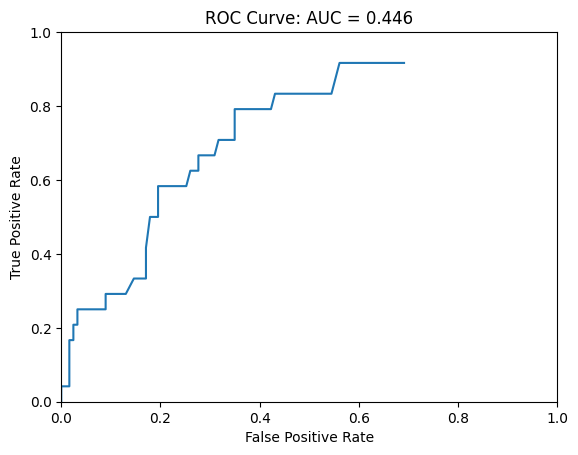

In [44]:
# Plot the ROC curve
t = np.arange(-5, 5, 0.05)
fpr = []
tpr = []
for thresh in t:
    y_pred = model.predict(x_test, thresh)
    tp = sum((y_test == 1) & (y_pred == 1)) + 1e-10
    tn = sum((y_test == 0) & (y_pred == 0)) + 1e-10
    fp = sum((y_test == 0) & (y_pred == 1)) + 1e-10
    fn = sum((y_test == 1) & (y_pred == 0)) + 1e-10
    fpr.append(fp / (fp + tn))
    tpr.append(tp / (tp + fn))
auc = -np.trapz(tpr, fpr)
plt.plot(fpr, tpr)
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC Curve: AUC = {auc:.3f}')
plt.show()

### T18. Change the number of discretization bins to 5. What happens to the RoC curve? Which discretization is better? The number of discretization bins can be considered as a hyperparameter, and must be chosen by comparing the final performance.


In [45]:
model_5_bins = SimpleBayesClassifier(n_pos = sum(y_train == 1), n_neg = sum(y_train == 0))
model_5_bins.fit_params(x_train, y_train, n_bins=5)

([(array([1.81918341e-10, 2.71186440e-01, 5.32203389e-01, 1.90960452e-01,
          5.64971768e-03]),
   array([-inf,  18.,  32.,  46.,  60.,  inf])),
  (array([1.45043002e-10, 2.05405405e-01, 8.82882883e-02, 1.31531531e-01,
          5.74774774e-01]),
   array([-inf,  -1.,   0.,   1.,   2.,  inf])),
  (array([1.79284780e-10, 3.30734966e-01, 3.19599109e-01, 3.48552338e-01,
          1.11358592e-03]),
   array([         -inf,  102.        ,  567.66666667, 1033.33333333,
          1499.        ,           inf])),
  (array([1.45043002e-10, 1.98198198e-01, 3.15315316e-02, 5.45945945e-01,
          2.24324324e-01]),
   array([-inf,  -1.,   0.,   1.,   2.,  inf])),
  (array([1.83368715e-10, 7.09567197e-01, 1.43507973e-01, 1.25284738e-01,
          2.16400913e-02]),
   array([       -inf,  1.        , 10.33333333, 19.66666667, 29.        ,
                  inf])),
  (array([1.81303752e-10, 3.09684684e-01, 3.74999999e-01, 2.81531531e-01,
          3.37837839e-02]),
   array([      -inf, 1.   

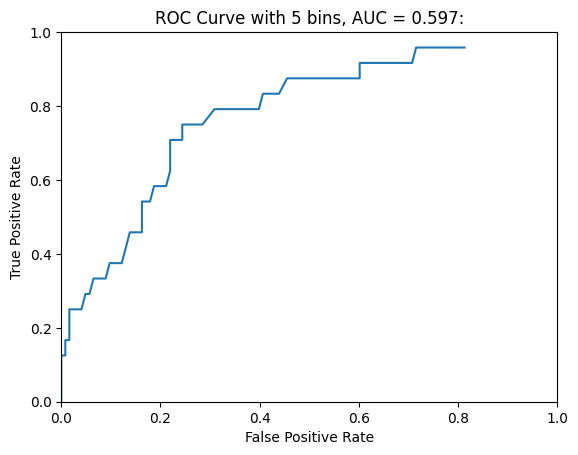

In [46]:
# Plot the ROC curve
t = np.arange(-5, 5, 0.05)
fpr = []
tpr = []
for thresh in t:
    y_pred = model_5_bins.predict(x_test, thresh)
    tp = sum((y_test == 1) & (y_pred == 1)) + 1e-10
    tn = sum((y_test == 0) & (y_pred == 0)) + 1e-10
    fp = sum((y_test == 0) & (y_pred == 1)) + 1e-10
    fn = sum((y_test == 1) & (y_pred == 0)) + 1e-10
    fpr.append(fp / (fp + tn))
    tpr.append(tp / (tp + fn))
auc = -np.trapz(tpr, fpr)
plt.plot(fpr, tpr)
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC Curve with 5 bins, AUC = {auc:.3f}:')
plt.show()

Based on the top-left corner of the ROC curve, a bin size of 5 is considered better than a bin size of 10. This is evident as it shows a higher true positive rate and a lower false positive rate at the top-left corner of the ROC curve, and a higher AUC.

### OT4. Shuffle the database, and create new test and train sets. Redo the entire training and evaluation process 10 times (each time with a new training and test set). Calculate the mean and variance of the accuracy rate.

In [47]:
seeds = [1, 13, 42, 69, 420, 666, 1337, 9001, 80085, 12345]
accuracy_list = []
for seed in seeds:
    df_train, df_test = train_test_split(df, test_size=0.1, random_state=seed, stratify=df['Attrition'])
    x_train = df_train.loc[:, df_train.columns != 'Attrition'].to_numpy()
    y_train = df_train['Attrition'].to_numpy()
    x_test = df_test.loc[:, df_test.columns != 'Attrition'].to_numpy()
    y_test = df_test['Attrition'].to_numpy()

    model = SimpleBayesClassifier(n_pos = sum(y_train == 1), n_neg = sum(y_train == 0))
    model.fit_params(x_train, y_train, n_bins=10)
    y_pred = model.predict(x = x_test)
    accuracy, precision, recall, F1, fpr = evaluate(y_test, y_pred, show_result=False)
    accuracy_list.append(accuracy)
print("10 times of the model with different random seeds for train-test split")
print(f"Mean accuracy: {np.mean(accuracy_list):.5f}\nVariance: {np.var(accuracy_list):.5f}")


10 times of the model with different random seeds for train-test split
Mean accuracy: 0.83605
Variance: 0.00067
